In [1]:
%pip install seaborn
import os

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [3]:
df = pd.read_csv('./dataSet/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

There are 900,000 rows (instances) with 30 features and one target variable
1. There is also no null value.
2.One object dtype (maybe no categorical).
Separating into different variables

In [15]:
integer = df.select_dtypes(int)
integer = integer.drop(['id'], axis =1)
integer.attrs['name'] = "integer" 
continuous = df.select_dtypes(float)
continuous.attrs['name'] = "continuous" #associating the name attribute to datase
#continuous.head()
word = df.select_dtypes(object)
word.attrs['name'] = "word"


In [19]:
continuous.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798


In [6]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [23]:
def plotFeatures(dataset, cols = 3):
    rows = math.ceil(dataset.shape[1]/cols)
    print (rows)
    fig, ax = plt.subplots(rows,cols, figsize = (20,20))
    ax = ax.flatten()
    for i, col in enumerate(dataset.columns):
        if dataset.attrs['name']== "integer":
            sns.countplot(x=dataset[col], data = dataset, ax = ax[i], hue = "target")
        if dataset.attrs['name']=="continuous":
            sns.histplot(data = dataset, x = dataset[col], hue =integer["target"],stat ='count', ax = ax[i])
            

5


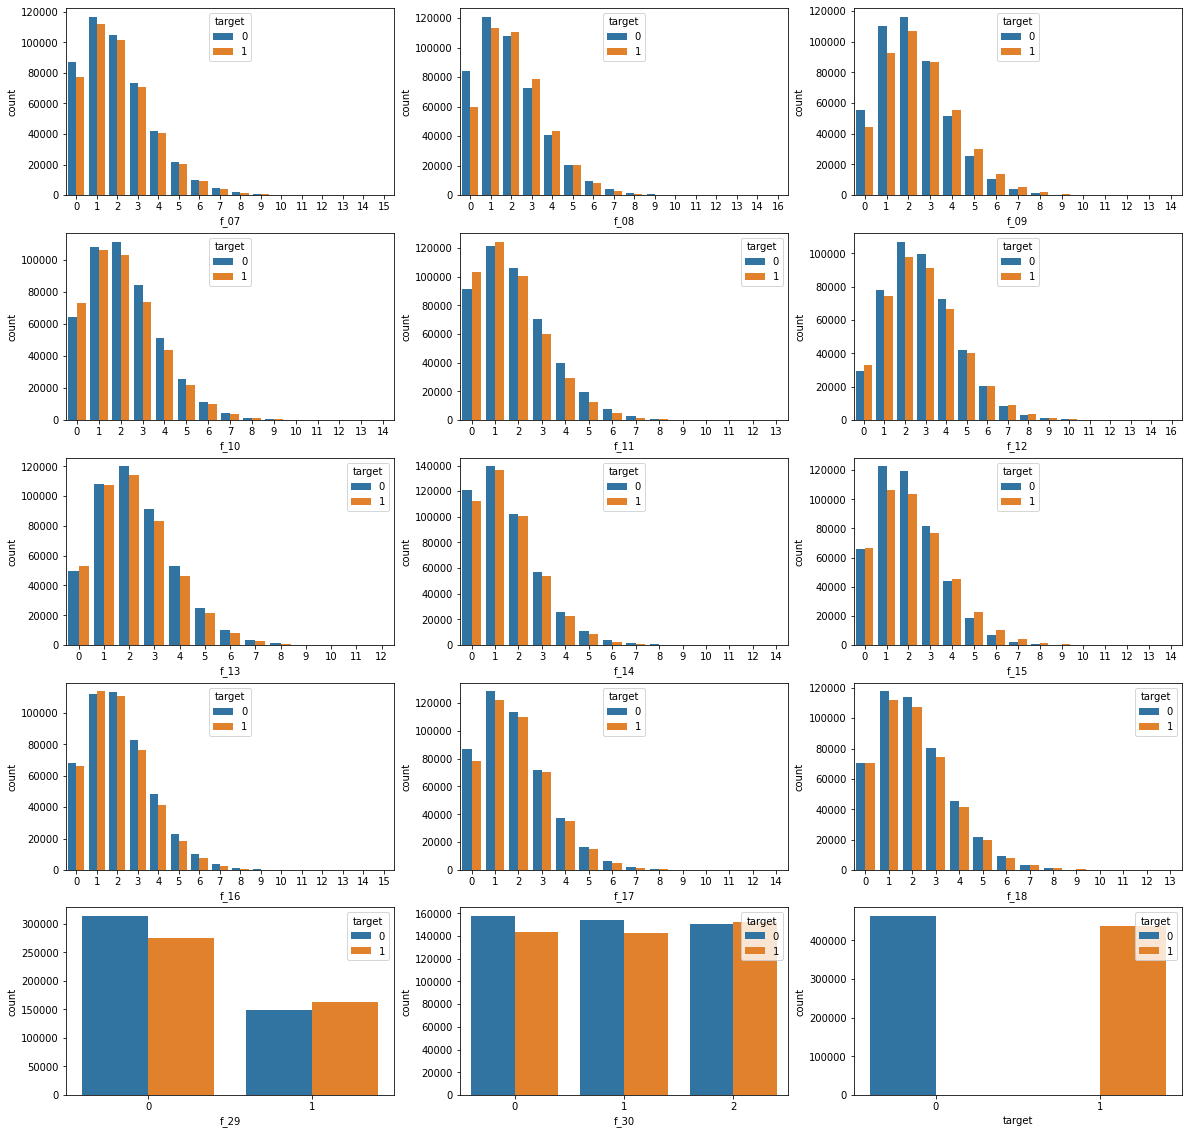

In [24]:
#Checking how the integer variable looks like.
plotFeatures(integer, cols = 3)

We notice most of the features vary from 0 to 8 mostly. They have simiar behavior increase till the 2-3 and then start to decrease. 
Only f_29 and f_30 have 2/3 discrete values making a ordinal categorical dataset.

6


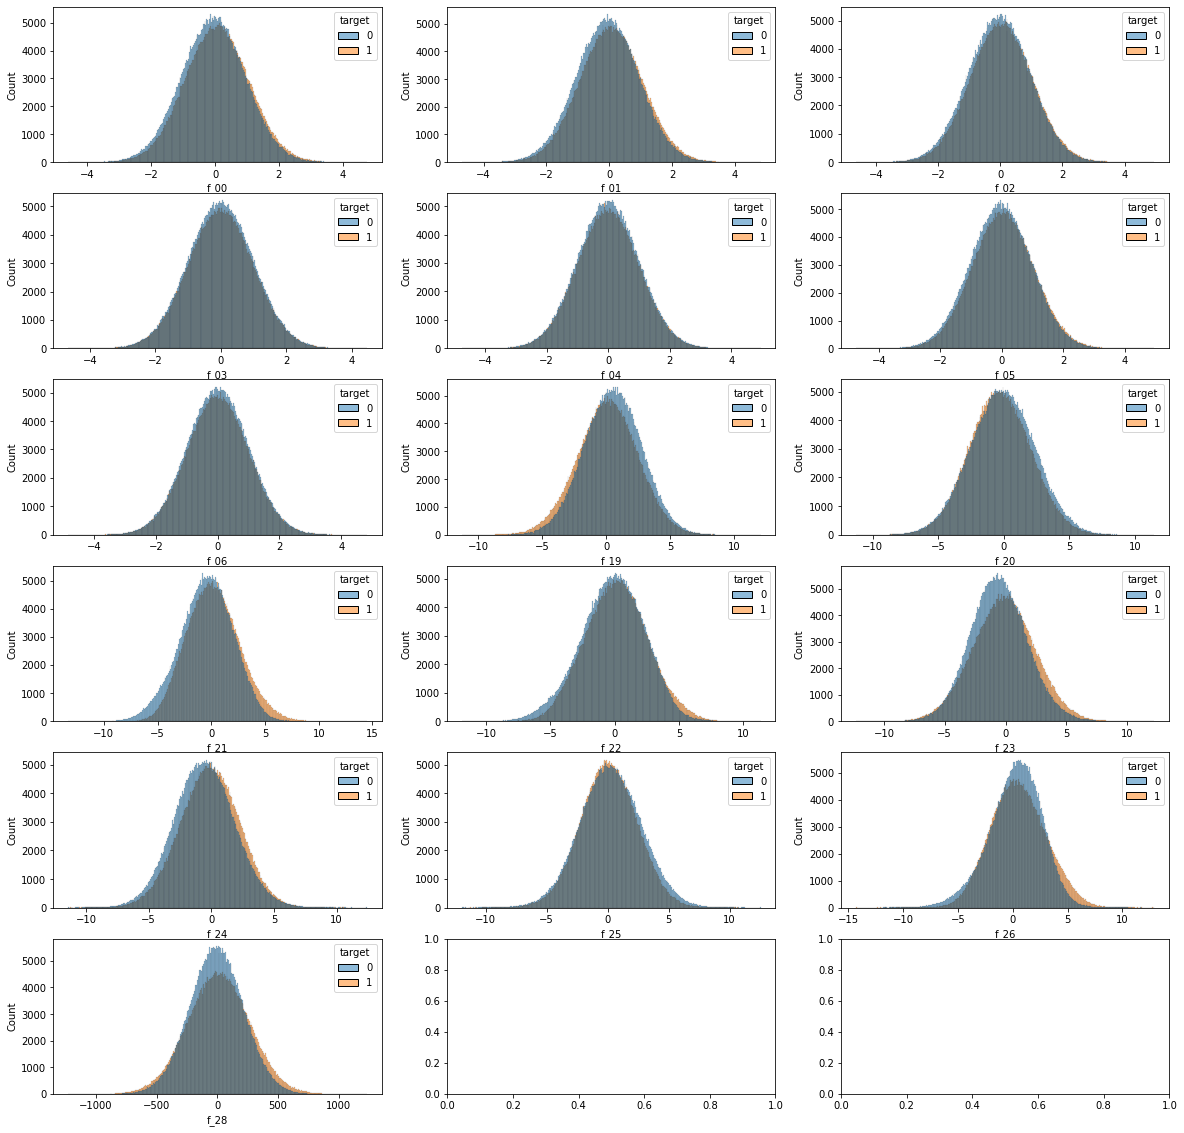

In [25]:
#Cheking how the continuous variable looks like 
plotFeatures(continuous, cols = 3)

all the features have continuous behavior ranging from -4 to +4 until f_05 then it spans from -10 to +10 and for f_28 it spans from -1000 to +1000.
1.It is hence, important to scale te f_28
2. Plot the box plot and relation with the target values

adding the boxplot for all the features with the target. 
Also relation between the target and the features (which we can see it is either  or 1 ) The information from the boxplot for feature and target should suffice

IndexError: index 30 is out of bounds for axis 0 with size 30

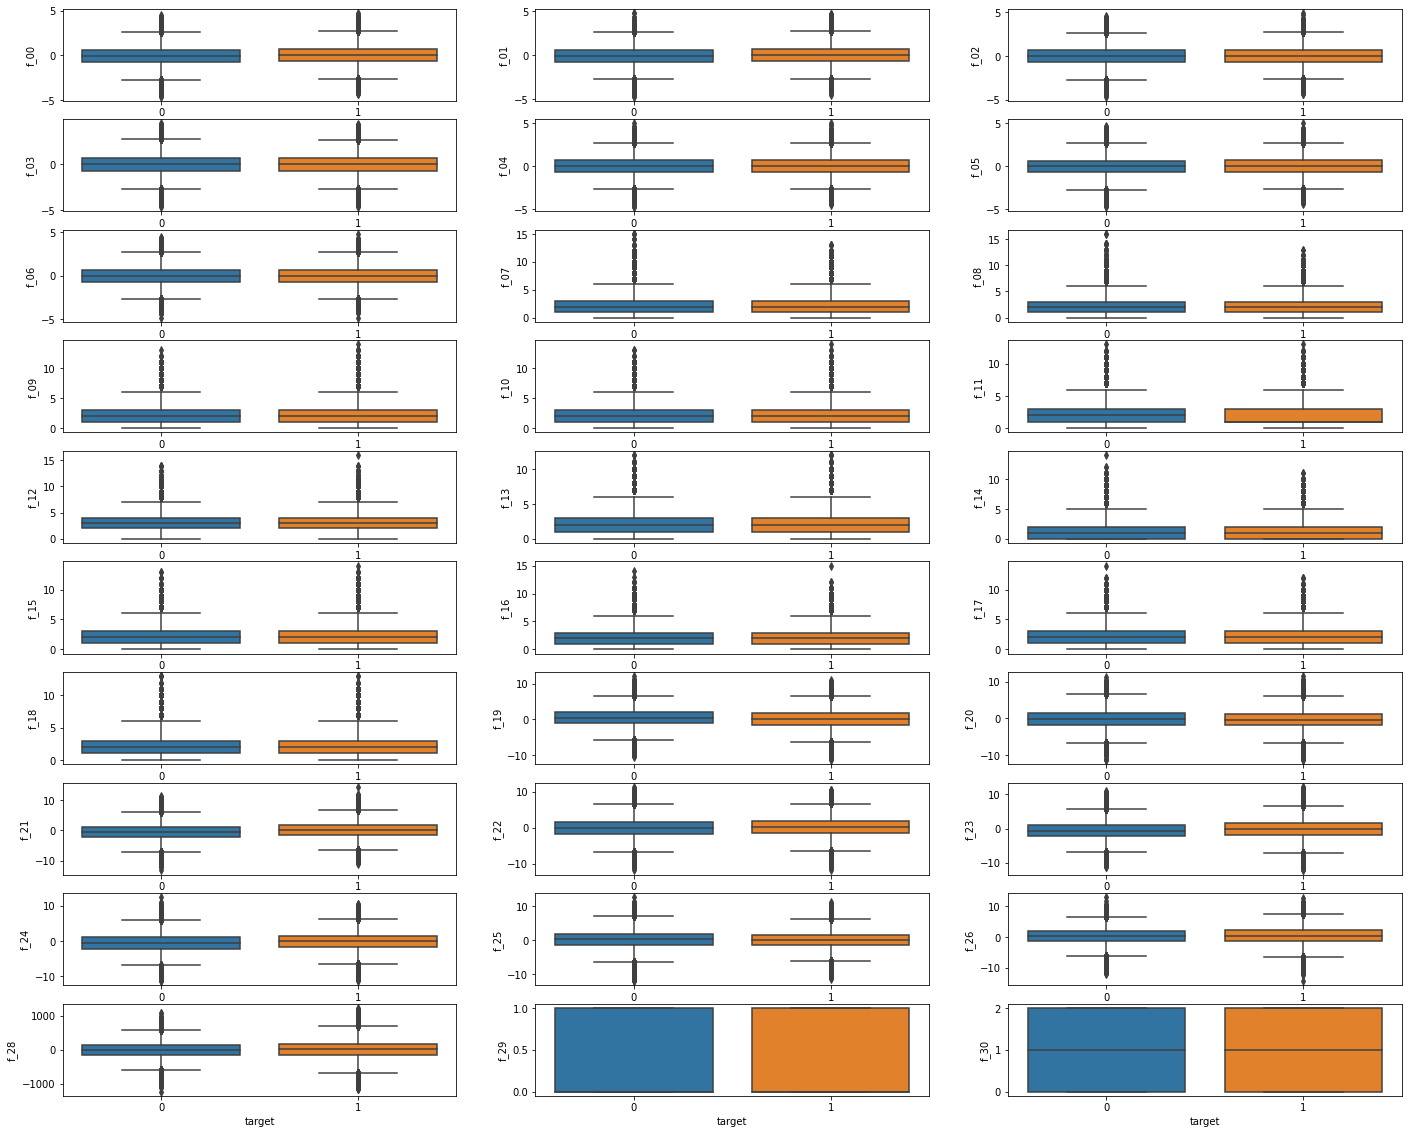

In [33]:
dfIntFloat = df.drop(['id', 'f_27'], axis = 1)
#dfIntFloat.head()
fig, ax = plt.subplots(10,3, figsize = (24,20))
ax = ax.flatten()
for i, col in enumerate(dfIntFloat.columns):
    sns.boxplot(data = dfIntFloat, x = "target", y = col, ax = ax[i])

In [35]:
# number of target values.
df['target'].value_counts()

0    462161
1    437839
Name: target, dtype: int64

Text(0.5, 1.0, 'Correlation heatmap')

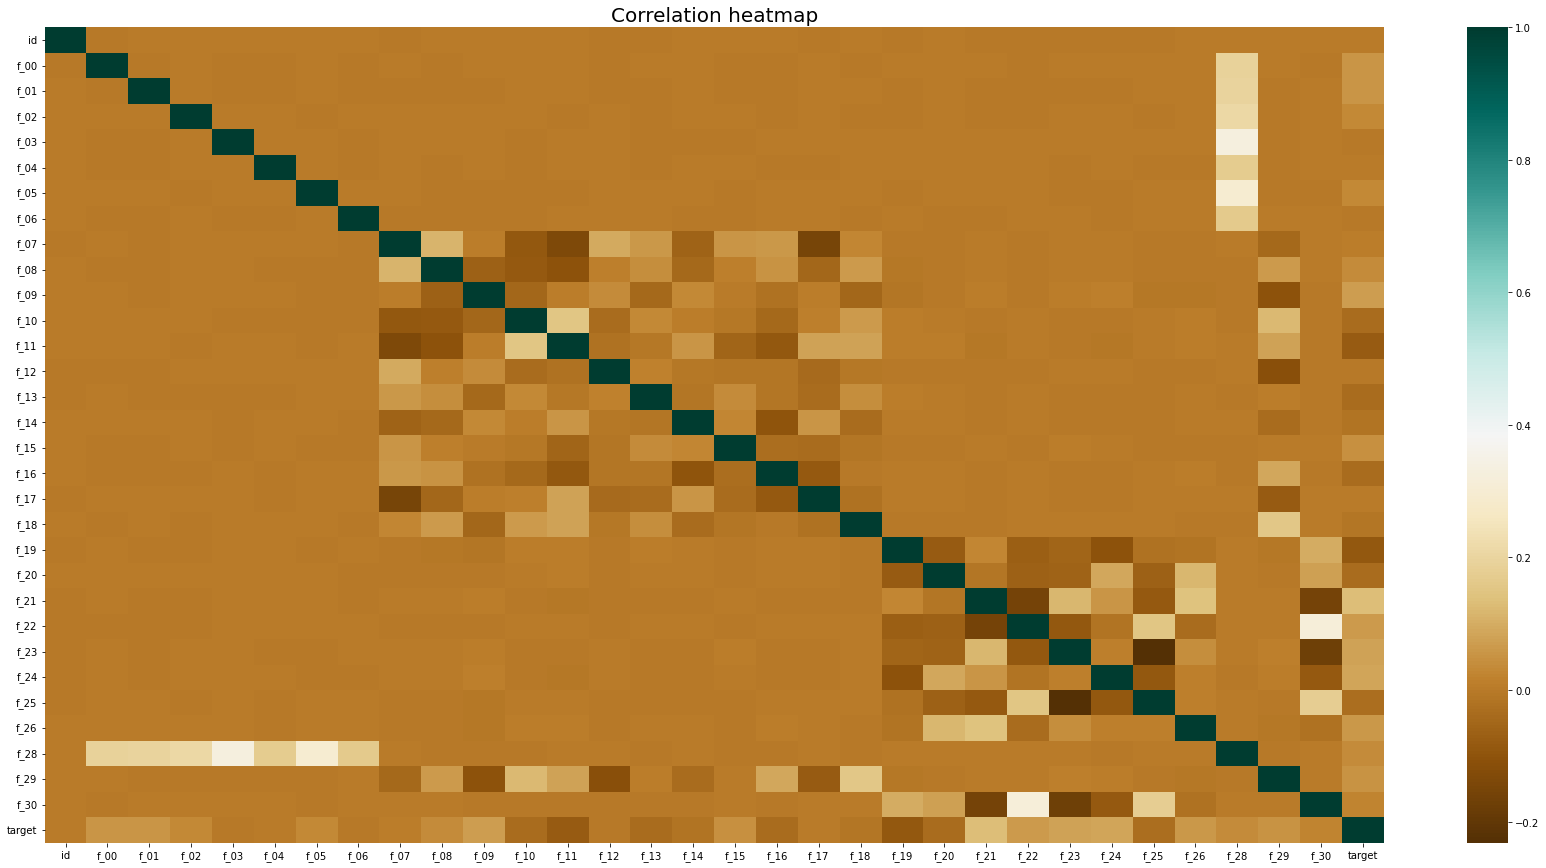

In [36]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), cmap ='BrBG')#, vmin = -1, vmax = 1,annot = True)
plt.title('Correlation heatmap',fontdict={'fontsize':20})


In [37]:
word.value_counts()

f_27      
BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBABLCB    10
ACBABAAJDC    10
BBBBBBDPCB    10
              ..
ADBBBAFEBE     1
ADBBBAFEDD     1
ADBBBAFEEB     1
ADBBBAFEED     1
BMBDEADPAC     1
Length: 741354, dtype: int64

We notice that all the features are -vely correlated except a couple of features which has small +ve correl
f_28 is strongly correlated with f_00 - f_06

Let's see how the f_27 behaves

In [38]:
word.duplicated().sum() #number of duplicates

158646

In [39]:
df['f_27'].str.count('A') #tells the number of A = pattern

0         4
1         3
2         5
3         2
4         0
         ..
899995    1
899996    0
899997    2
899998    5
899999    3
Name: f_27, Length: 900000, dtype: int64

In [16]:
print(df['f_27'].str.startswith('A'), df['f_27'].str.endswith('A'))

0          True
1          True
2          True
3         False
4         False
          ...  
899995    False
899996    False
899997     True
899998     True
899999    False
Name: f_27, Length: 900000, dtype: bool 0         False
1         False
2         False
3         False
4         False
          ...  
899995    False
899996    False
899997     True
899998    False
899999    False
Name: f_27, Length: 900000, dtype: bool


In [49]:
df['f_27'].str.findall('AB').value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                  413362
[AB]                373429
[AB, AB]            103893
[AB, AB, AB]          8963
[AB, AB, AB, AB]       353
Name: f_27, dtype: int64

In [41]:
import string

In [42]:
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
for character in alphabet_upper:
    char_counts.append(df["f_27"].str.count(character).sum())

9000000


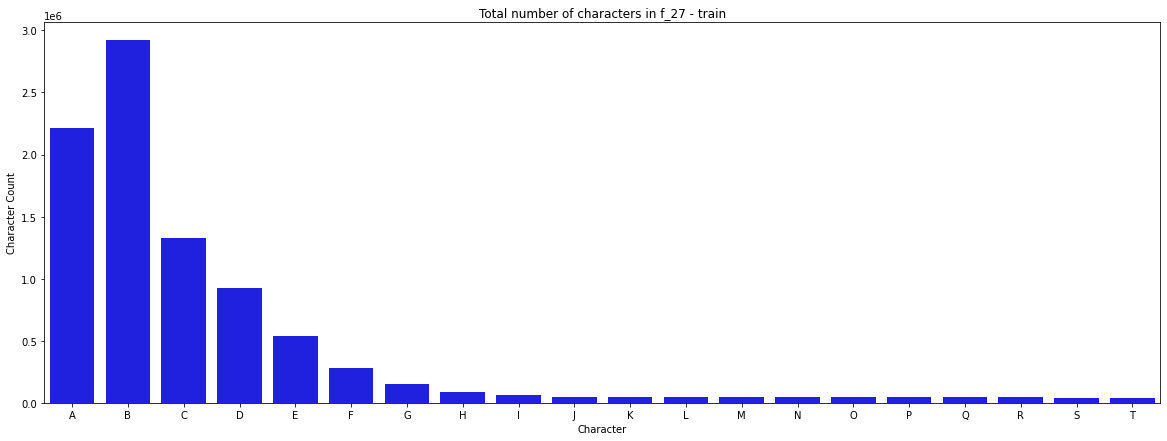

In [43]:
char_counts_df = pd.DataFrame({"Character": alphabet_upper, "Character Count": char_counts})
char_counts_df = char_counts_df.loc[char_counts_df["Character Count"] > 0]
print(np.sum(char_counts))
#No other hidden characters

plt.subplots(figsize=(20,7))
sns.barplot(data = char_counts_df, x="Character", y="Character Count", color="blue");
plt.title("Total number of characters in f_27 - train");

In [44]:
char_counts_df = char_counts_df.set_index("Character", drop = False)


In [45]:
for i in range(10):
    char_counts_df["character"+str(i+1)] = df["f_27"].str[i].value_counts()
char_counts_df = char_counts_df.fillna(0)
char_counts_df


,Character,Character Count,character1,character2,character3,character4,character5,character6,character7,character8,character9,character10
Character,,,,,,,,,,,,
A,A,2214818,451207.0,144762.0,297840.0,160839.0,259608.0,479108.0,101624.0,45103,159749.0,114978.0
B,B,2919752,448793.0,245160.0,602160.0,237218.0,284565.0,420892.0,200124.0,45834,224875.0,210131.0
C,C,1331088,0.0,225931.0,0.0,210015.0,196631.0,0.0,220127.0,45780,213449.0,219155.0
D,D,926075,0.0,149579.0,0.0,143633.0,98838.0,0.0,173343.0,45568,149312.0,165802.0
E,E,537776,0.0,78807.0,0.0,81662.0,38895.0,0.0,107769.0,45871,84428.0,100344.0
F,F,283771,0.0,35487.0,0.0,39504.0,14101.0,0.0,56428.0,45894,40704.0,51653.0
G,G,147484,0.0,13713.0,0.0,17121.0,5018.0,0.0,25318.0,45539,17533.0,23242.0
H,H,84653,0.0,4647.0,0.0,6473.0,1666.0,0.0,9972.0,45769,6530.0,9596.0
I,I,59478,0.0,1361.0,0.0,2379.0,484.0,0.0,3678.0,45783,2378.0,3415.0


Looking at the table above. We see there character1, 3 and 6 just has A/B . character 8 has all the letter equally spread.

In [46]:
char_counts_df.info() #this doesnt help really 

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, A to T
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Character        20 non-null     object 
 1   Character Count  20 non-null     int64  
 2   character1       20 non-null     float64
 3   character2       20 non-null     float64
 4   character3       20 non-null     float64
 5   character4       20 non-null     float64
 6   character5       20 non-null     float64
 7   character6       20 non-null     float64
 8   character7       20 non-null     float64
 9   character8       20 non-null     int64  
 10  character9       20 non-null     float64
 11  character10      20 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.0+ KB


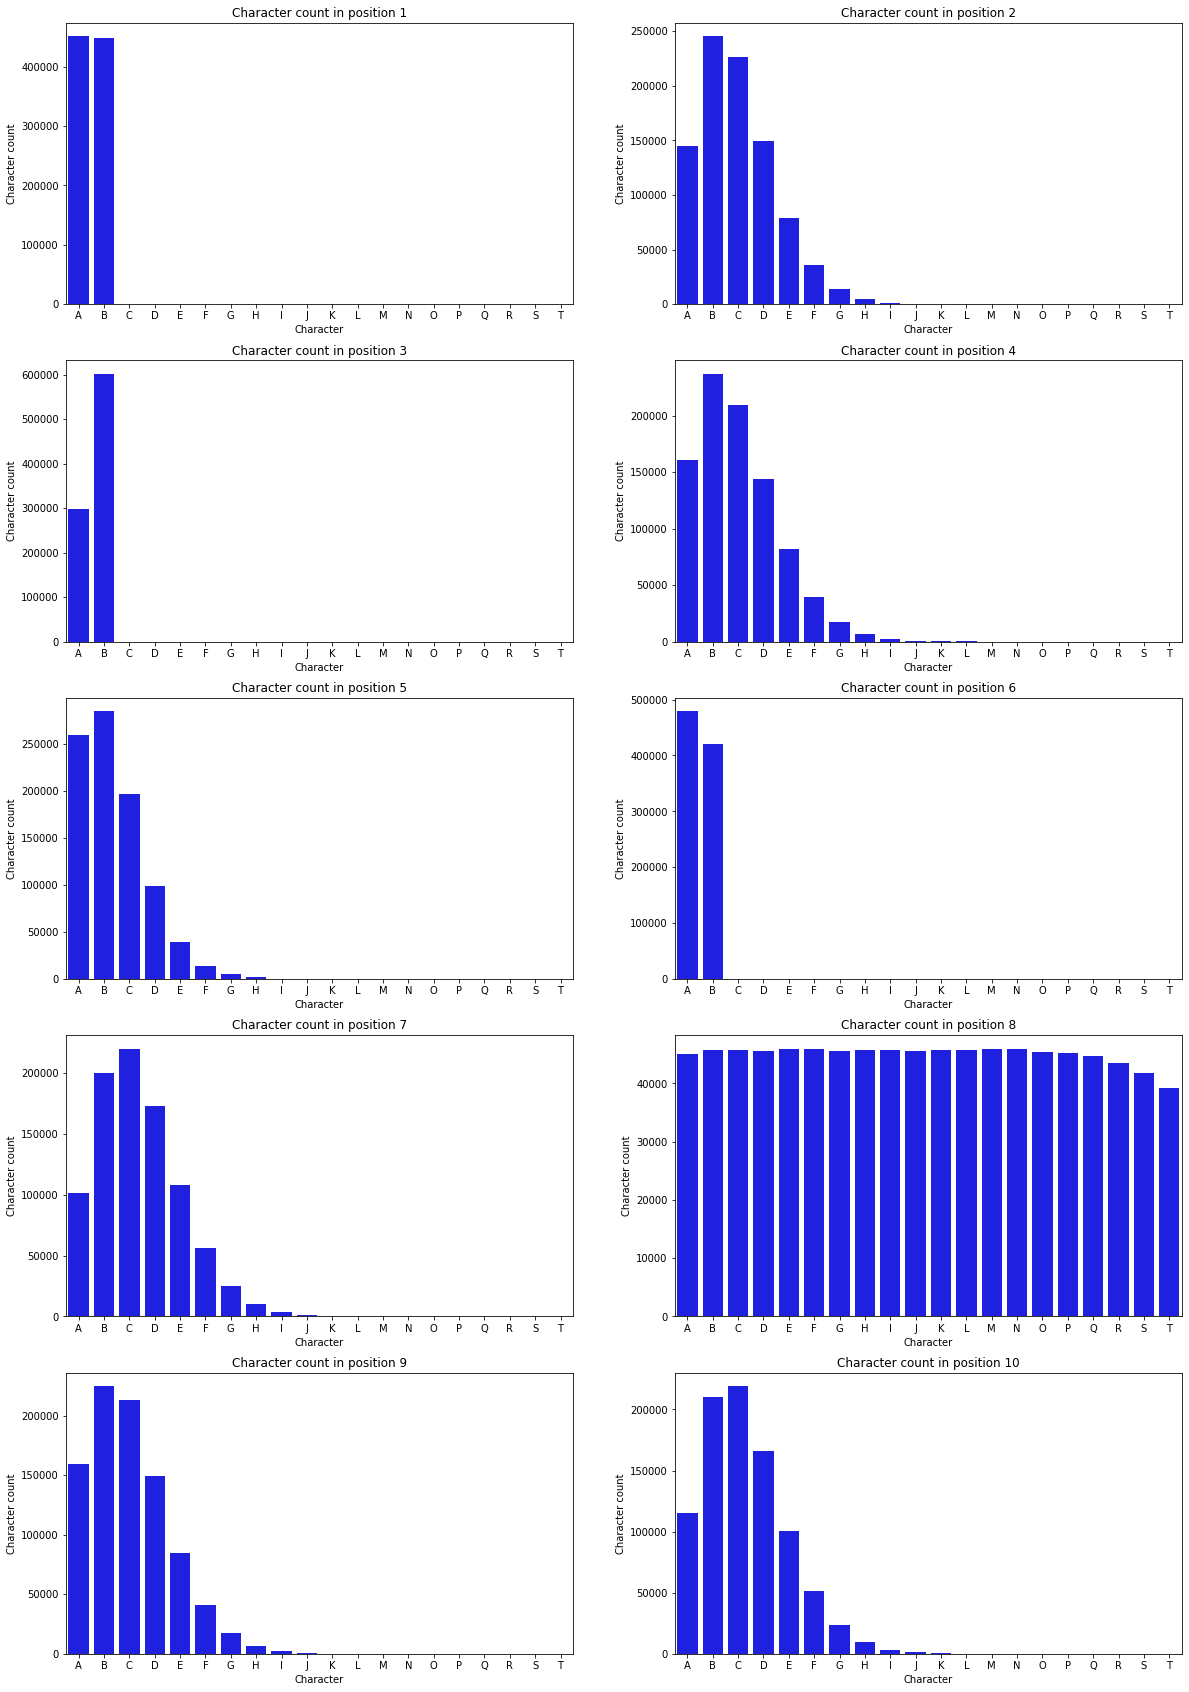

In [47]:
cols = 2
rows = math.ceil(char_counts_df.shape[1]/cols)
#print (rows)
fig, ax = plt.subplots(rows-1,cols, figsize = (20,30))
ax = ax.flatten()
character_cols = [i for i in char_counts_df.columns if "character" in i]
for i, col in enumerate(character_cols):
    #print(col)
    ax[i] = sns.barplot(x="Character", data = char_counts_df, y = col,ax = ax[i], color = "blue");
    ax[i].set_title("Character count in position "+str(i+1))
    ax[i].set_ylabel("Character count")
    